In [22]:
!pip install rdkit-pypi
!pip install mordred

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mordred import Calculator, descriptors
import seaborn as sns
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import base64
import matplotlib.pyplot as plt
from io import BytesIO
%matplotlib inline
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings

In [45]:
A = pd.read_csv('pdl1.csv')
A

,SMILES,IC50,pIC50
0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504
1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505
2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011
3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456
4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351
...,...,...,...
1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142
1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729
1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576
1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849


(array([  4.,  31.,  75., 153., 144., 194., 138.,  78., 199., 424.]),
 array([ 4.01502287,  4.63570546,  5.25638805,  5.87707064,  6.49775322,
         7.11843581,  7.7391184 ,  8.35980099,  8.98048357,  9.60116616,
        10.22184875]),
 <BarContainer object of 10 artists>)

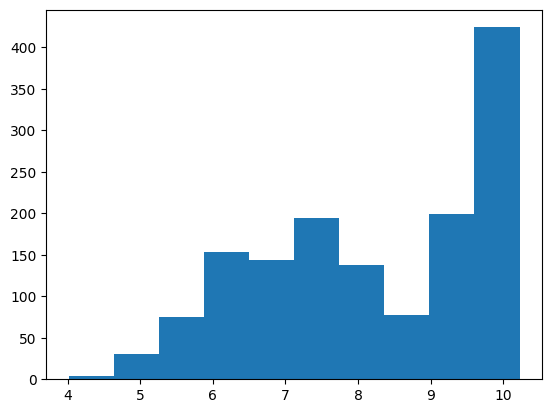

In [25]:
plt.hist(X.pIC50)

In [26]:
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

In [27]:
Canon_SMILES = canonical_smiles(X.SMILES)
len(Canon_SMILES)

1440

In [46]:
A['SMILES_new'] = Canon_SMILES
A

,SMILES,IC50,pIC50,SMILES_new
0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4)c...
1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4C)...
2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011,CCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CNC...
3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456,CCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CN...
4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351,COCCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(...
...,...,...,...,...
1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142,Cc1c(-c2ccccc2)cccc1-c1nnc(Nc2cccc(CN3CCOCC3)c...
1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CNC(C)(C)C(=O)N3...
1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576,COc1nc(-c2cccc(-c3ccccc3)c2C)ccc1CNCCNC(=O)c1c...
1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN3CCCCC3C(=O)N3...


In [47]:
df_drop = A.drop_duplicates('SMILES')
df_drop

,SMILES,IC50,pIC50,SMILES_new
0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4)c...
1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4C)...
2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011,CCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CNC...
3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456,CCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CN...
4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351,COCCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(...
...,...,...,...,...
1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142,Cc1c(-c2ccccc2)cccc1-c1nnc(Nc2cccc(CN3CCOCC3)c...
1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CNC(C)(C)C(=O)N3...
1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576,COc1nc(-c2cccc(-c3ccccc3)c2C)ccc1CNCCNC(=O)c1c...
1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN3CCCCC3C(=O)N3...


(array([  4.,  31.,  74., 153., 138., 194., 138.,  78., 197., 411.]),
 array([ 4.01502287,  4.63570546,  5.25638805,  5.87707064,  6.49775322,
         7.11843581,  7.7391184 ,  8.35980099,  8.98048357,  9.60116616,
        10.22184875]),
 <BarContainer object of 10 artists>)

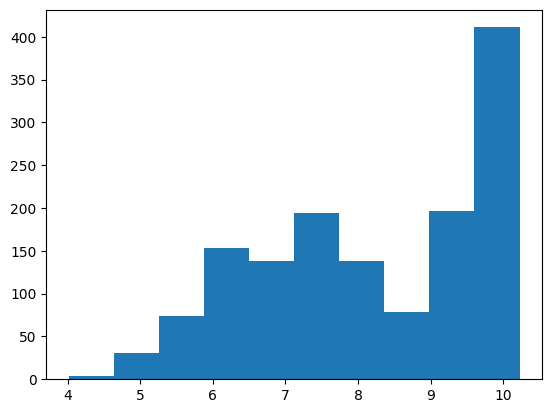

In [30]:
plt.hist(df_drop.pIC50)

In [38]:
def All_Mordred_descriptors(df_drop):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in df_drop]
    df = calc.pandas(mols)
    return df



In [39]:
mordred_descriptors = All_Mordred_descriptors(df_drop['SMILES_new'])

  1%|          | 8/1418 [00:02<05:45,  4.08it/s]

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 9/1418 [00:03<09:19,  2.52it/s]

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 17/1418 [00:06<09:57,  2.35it/s]

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1418/1418 [05:34<00:00,  4.24it/s]


In [40]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,55.98029,2.462072,4.888468,55.98029,1.301867,4.682799,...,10.600502,93.926457,594.239769,7.618459,7393,67,222.0,259.0,12.694444,9.611111
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,57.132715,2.482341,4.912528,57.132715,1.298471,4.705725,...,10.646781,95.447729,608.255419,7.509326,7866,70,228.0,267.0,13.555556,9.805556
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,58.458181,2.487929,4.919335,58.458181,1.299071,4.726221,...,10.664270,96.553856,622.271069,7.407989,8383,72,232.0,272.0,13.805556,10.138889
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,59.696118,2.489356,4.921111,59.696118,1.297742,4.746218,...,10.672461,97.619769,636.286719,7.313640,8945,73,236.0,276.0,14.055556,10.388889
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,62.245625,2.489808,4.921688,62.245625,1.296784,4.785048,...,10.684302,99.742532,666.297284,7.321948,10208,75,244.0,284.0,14.555556,10.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,42.907237,2.434918,4.83307,42.907237,1.340851,4.407957,...,10.313376,81.550972,426.205576,7.348372,3368,48,170.0,199.0,7.5,7.027778
1414,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,77.199605,2.42024,4.840481,77.199605,1.308468,5.005695,...,11.013715,98.205108,810.304494,7.944162,18480,100,314.0,370.0,18.0625,12.875000
1415,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,55.031364,2.433555,4.867109,55.031364,1.310271,4.660763,...,10.616021,79.314414,563.228102,7.932790,7994,69,218.0,256.0,12.444444,9.388889
1416,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,80.967622,2.431144,4.862287,80.967622,1.327338,5.044198,...,11.043514,100.375216,836.320144,7.889813,19600,104,326.0,386.0,16.972222,13.388889


In [41]:
bool_cols = mordred_descriptors.select_dtypes(include=[bool]).columns
mordred_descriptors[bool_cols] = mordred_descriptors[bool_cols].replace({False: np.nan, True: np.nan})

obj_cols = mordred_descriptors.select_dtypes(include=[object]).columns
mordred_descriptors[obj_cols] = mordred_descriptors[obj_cols].apply(pd.to_numeric, errors='coerce')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31412\1697695098.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mordred_descriptors[bool_cols] = mordred_descriptors[bool_cols].replace({False: np.nan, True: np.nan})


In [53]:
X = mordred_descriptors
Y = df_drop.pIC50
Y

0       5.865504
1       6.056505
2       6.129011
3       5.762456
4       6.043351
          ...   
1435    7.193142
1436    6.882729
1437    6.966576
1438    8.221849
1439    6.821023
Name: pIC50, Length: 1418, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 251101  )